# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_dataset.csv')
df.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [3]:
df.head(10)

popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          73       230666     False         0.676  0.4610    1    -6.746   
1          55       149610     False         0.420  0.1660    1   -17.235   
2          57       210826     False         0.438  0.3590    0    -9.734   
3          71       201933     False         0.266  0.0596    0   -18.515   
4          82       198853     False         0.618  0.4430    2    -9.681   
5          58       214240     False         0.688  0.4810    6    -8.807   
6          74       229400     False         0.407  0.1470    2    -8.822   
7          80       242946     False         0.703  0.4440   11    -9.331   
8          74       189613     False         0.625  0.4140    0    -8.700   
9          56       205594     False         0.442  0.6320    1    -6.770   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.1430        0.0322          0.000001    0.3580   0.7150   
1     1       0.0763        0.9240          0.000006    0.1010   0.2670   
2     1       0.0557        0.2100          0.000000    0.1170   0.1200   
3     1       0.0363        0.9050          0.000071    0.1320   0.1430   
4     1       0.0526        0.4690          0.000000    0.0829   0.1670   
5     1       0.1050        0.2890          0.000000    0.1890   0.6660   
6     1       0.0355        0.8570          0.000003    0.0913   0.0765   
7     1       0.0417        0.5590          0.000000    0.0973   0.7120   
8     1       0.0369        0.2940          0.000000    0.1510   0.6690   
9     1       0.0295        0.4260          0.004190    0.0735   0.1960   

     tempo  time_signature track_genre  
0   87.917               4    acoustic  
1   77.489               4    acoustic  
2   76.332               4    acoustic  
3  181.740               3    acoustic  
4  119.949               4    acoustic  
5   98.017               4    acoustic  
6  141.284               3    acoustic  
7  150.960               4    acoustic  
8  130.088               4    acoustic  
9   78.899               4    acoustic

### Plot correlation heatmap

<Axes: >

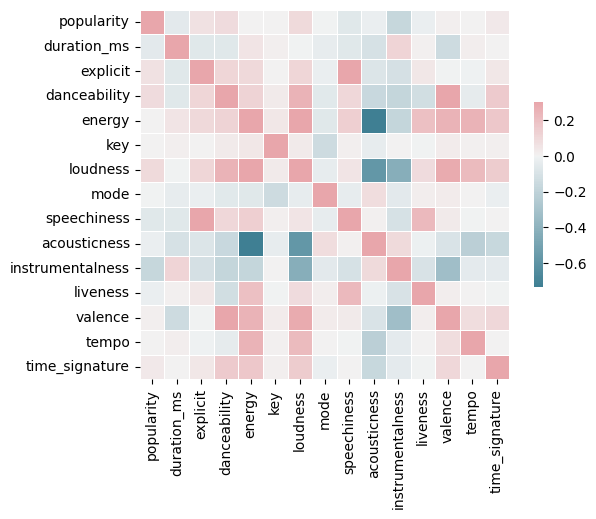

In [4]:
cmap = sns.diverging_palette(220,10, as_cmap =True)
sns.heatmap(df.drop(['track_genre'],axis=1).corr(), vmax=.3,center=0,square = True, linewidths = .5,cbar_kws={"shrink":.5},cmap = cmap)

### Plot distribution of continuous variables

In [5]:
def plot_continuous_distribution(df, cols):
    for col in cols:
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

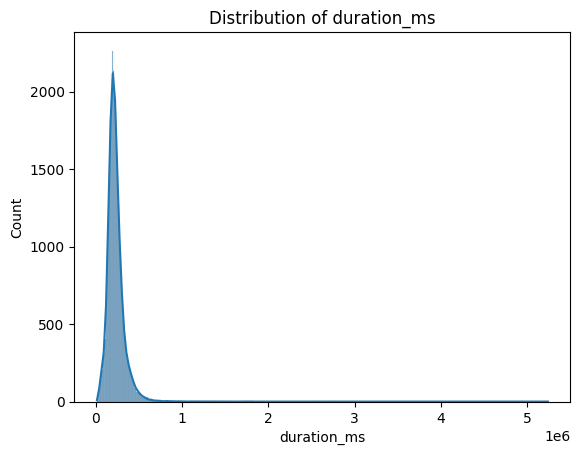

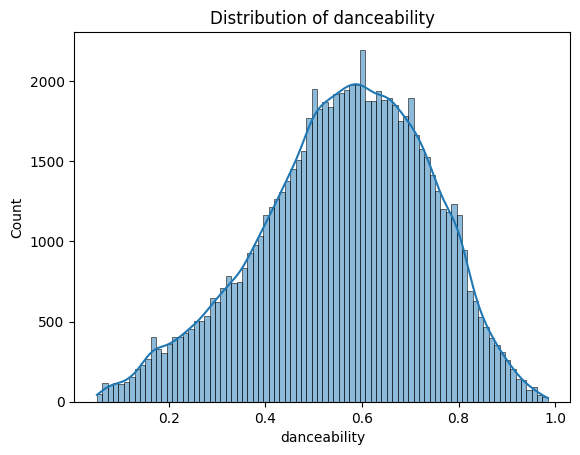

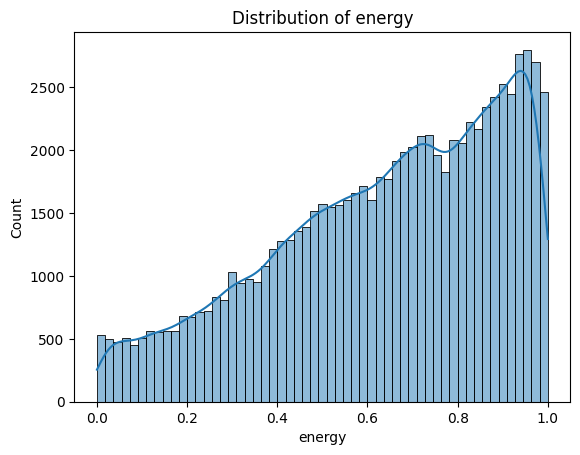

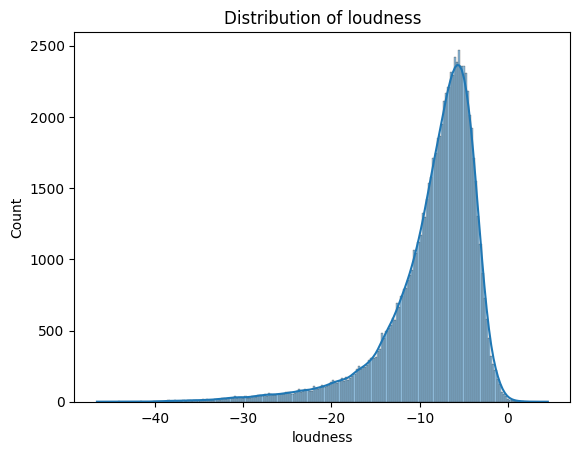

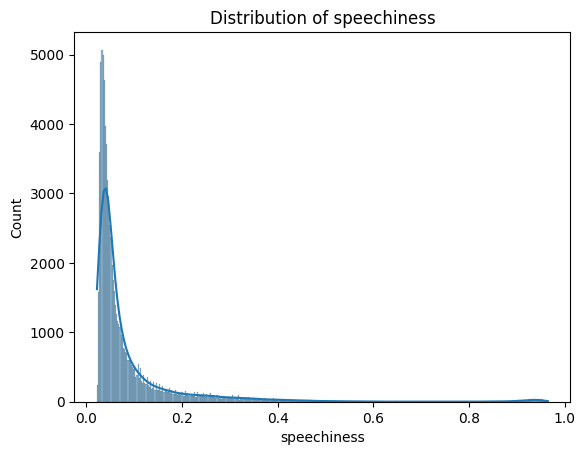

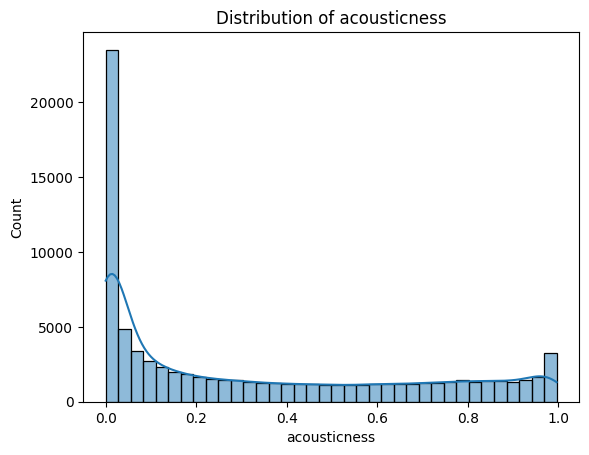

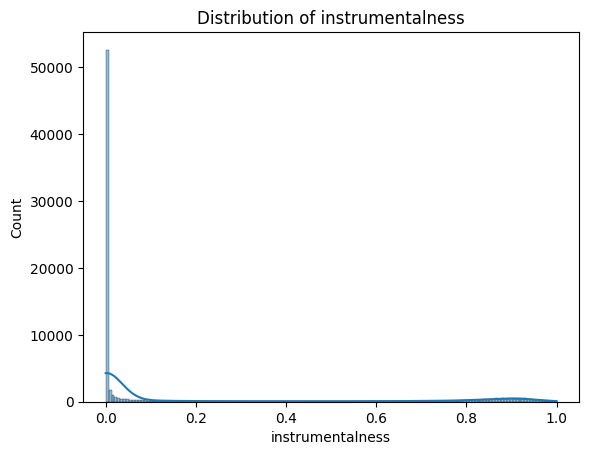

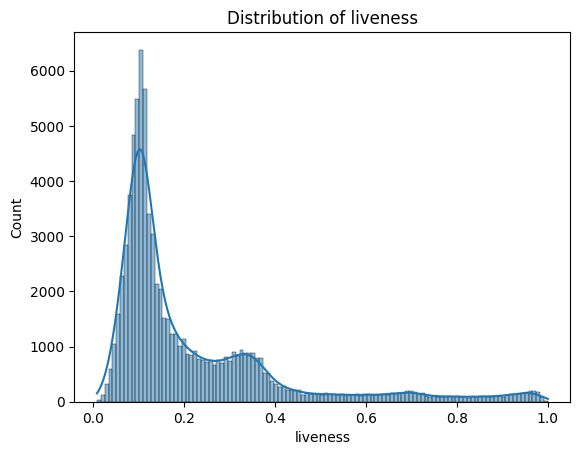

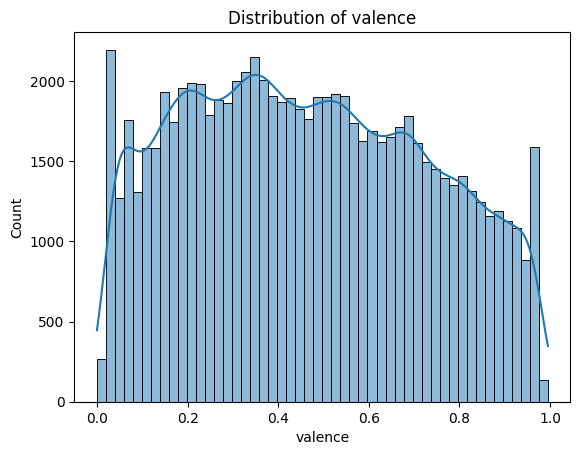

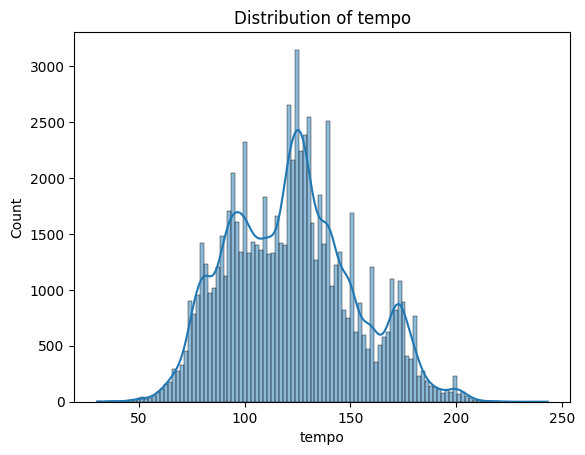

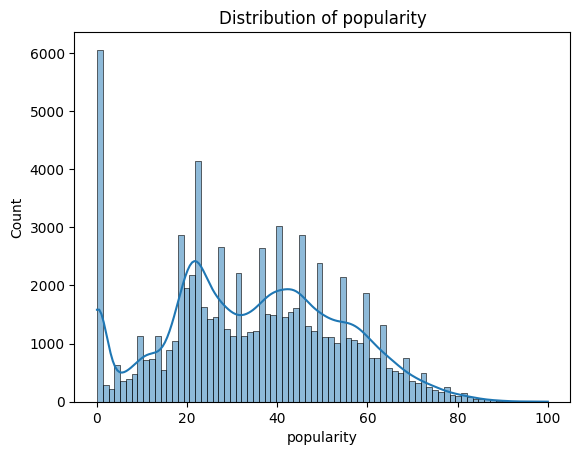

In [6]:
cont_features = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','popularity']
plot_continuous_distribution(df,cont_features)

### Plot barchart for categorical features

In [7]:
def plot_cat_barcharts(df, cat_features):
    for cat_feature in cat_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=cat_feature, data=df, order=df[cat_feature].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f"{cat_feature.capitalize()} Counts")
        plt.show()

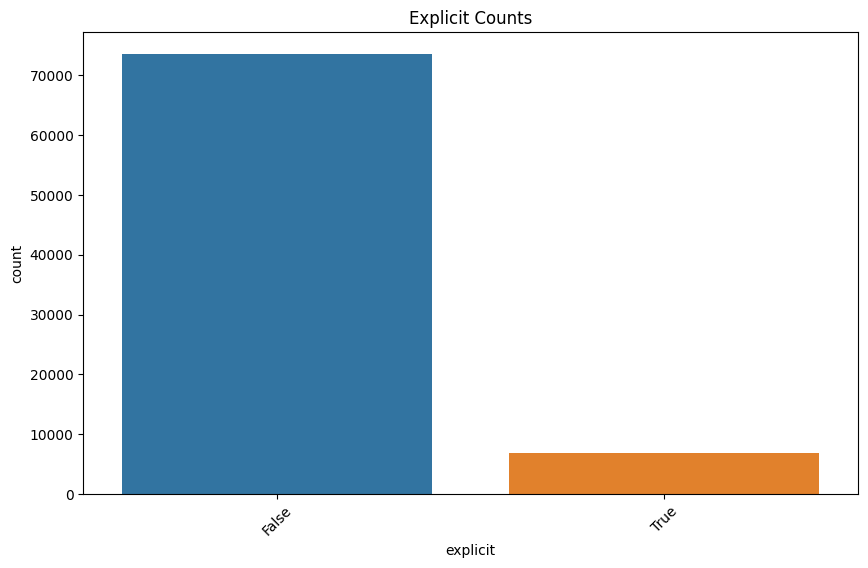

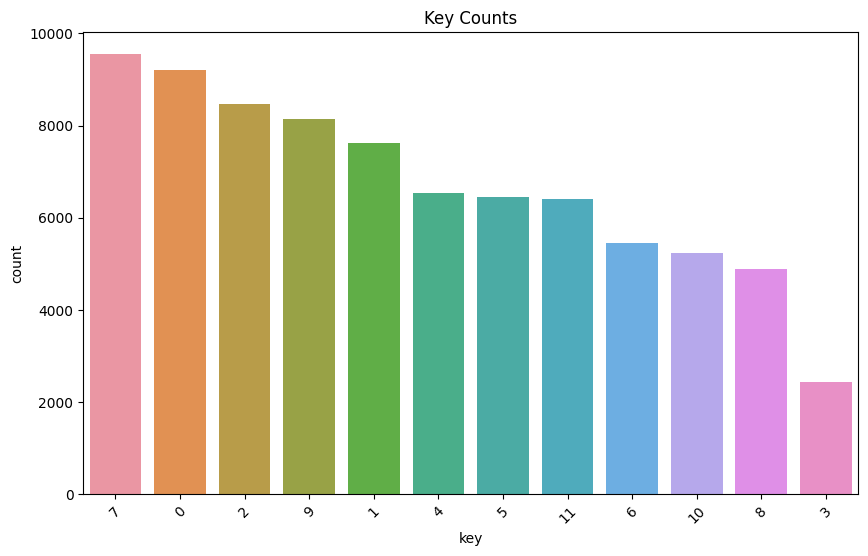

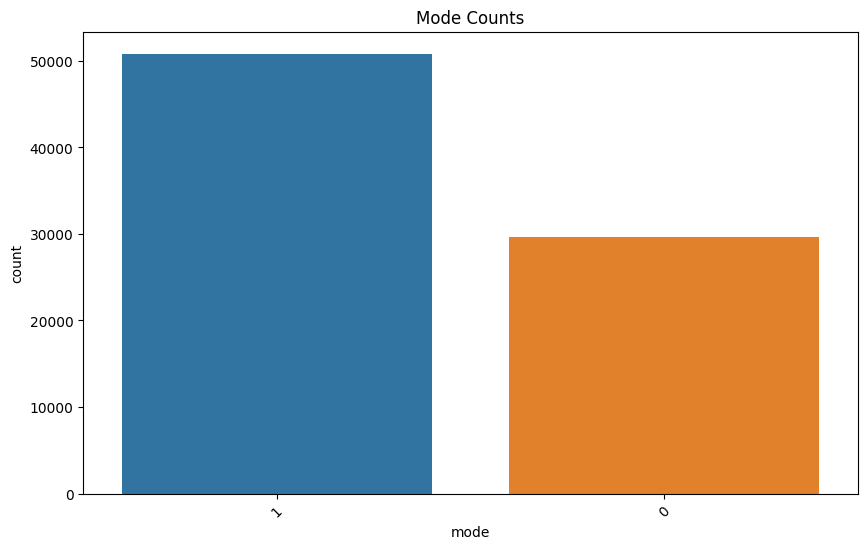

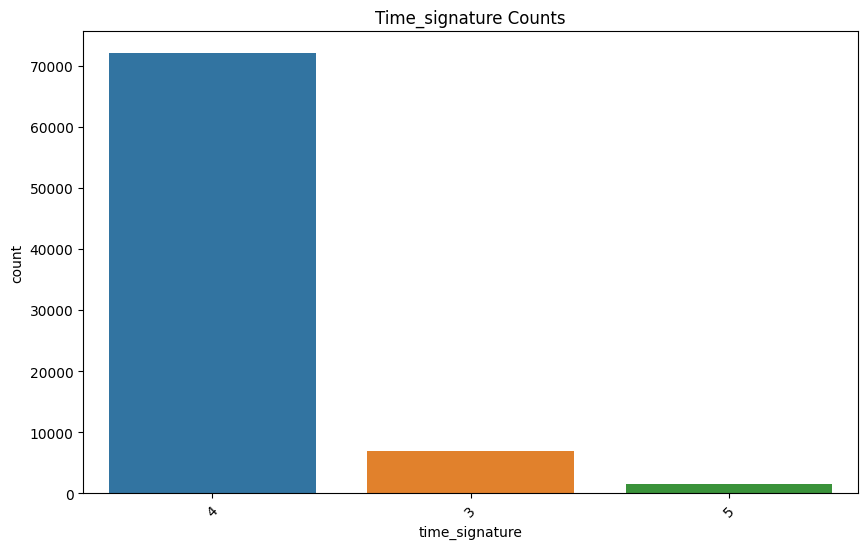

In [8]:
cat_features = ['explicit','key','mode','time_signature']
plot_cat_barcharts(df,cat_features)

### Scatter plot of continuous features vs popularity

In [9]:
def plot_scatter(df, cont_features):
    fig, axs = plt.subplots(nrows=len(cont_features), figsize=(8, 5*len(cont_features)))
    for i, feature in enumerate(cont_features):
        axs[i].scatter(df[feature], df['popularity'])
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel('popularity')
    plt.tight_layout()
    plt.show()

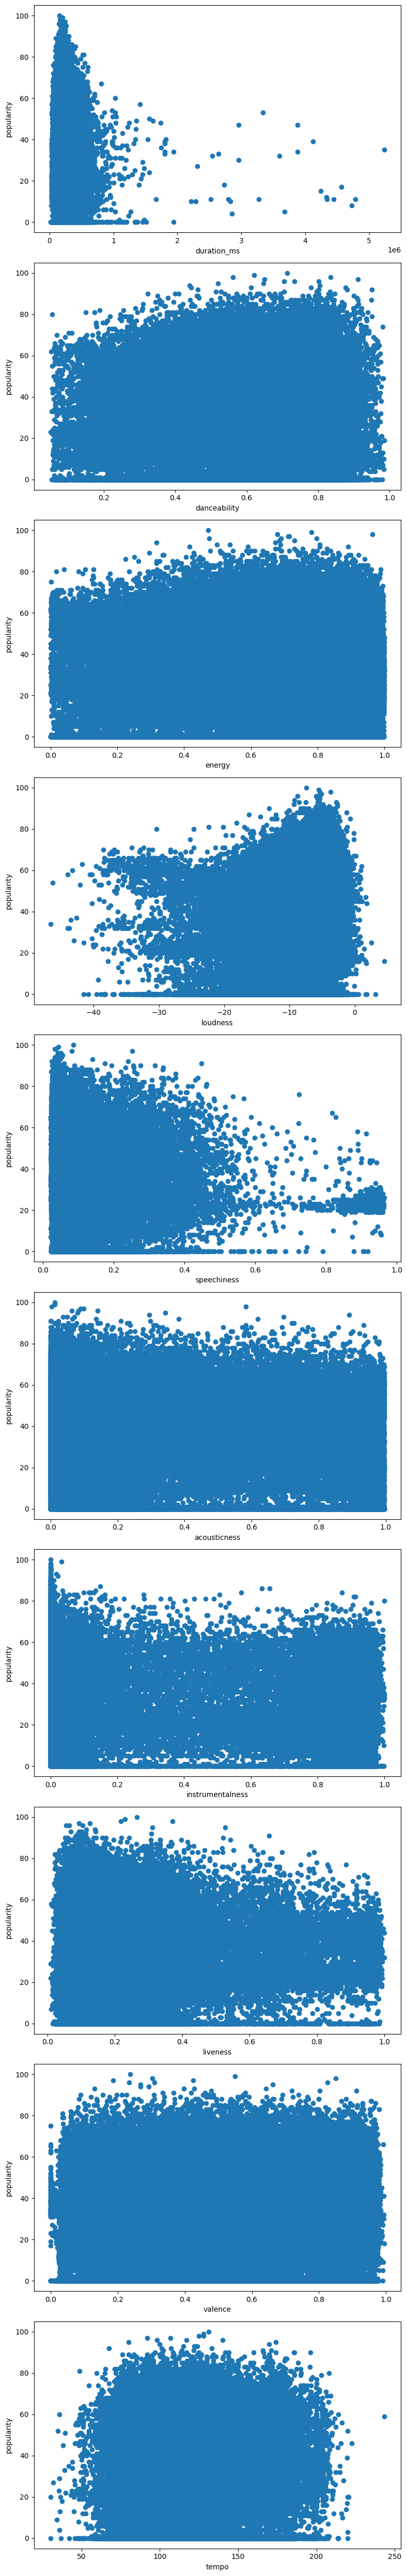

In [10]:
cont_features = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
plot_scatter(df, cont_features)

### Box plot for categorical features vs popularity

In [11]:
def plot_box_cat(df, cat_features):
    for col in cat_features:
        sns.boxplot(x=col, y='popularity', data=df)
        plt.title(f"{col.capitalize()} vs {'popularity'.capitalize()}")
        plt.show()

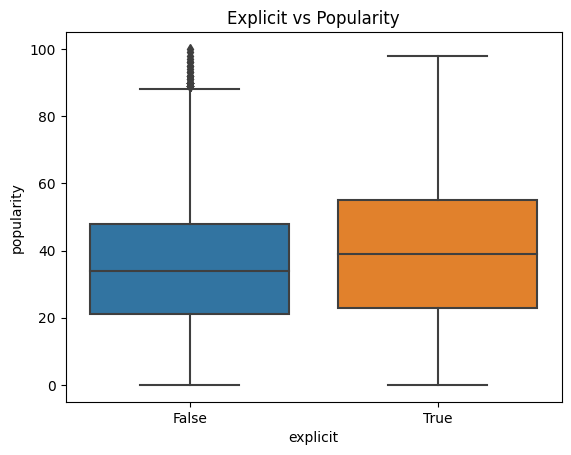

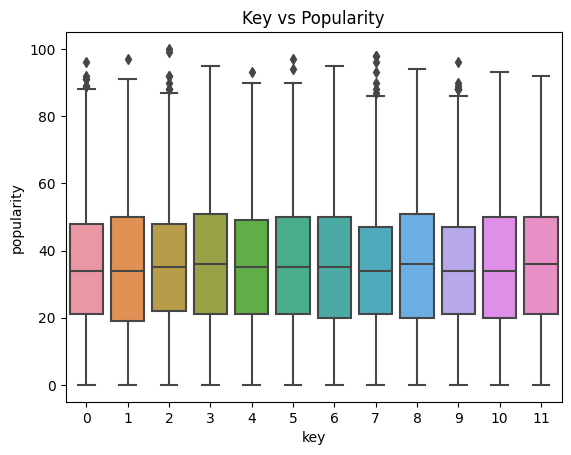

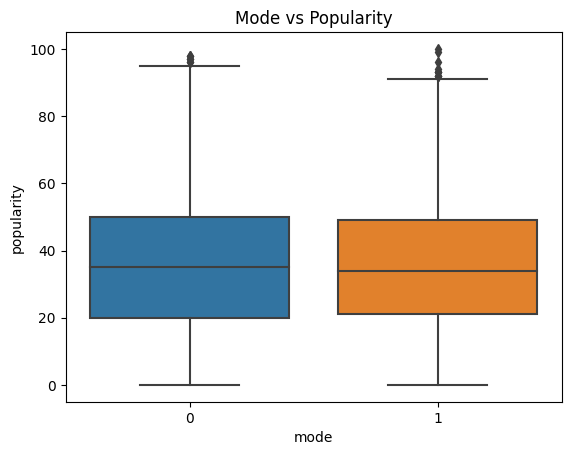

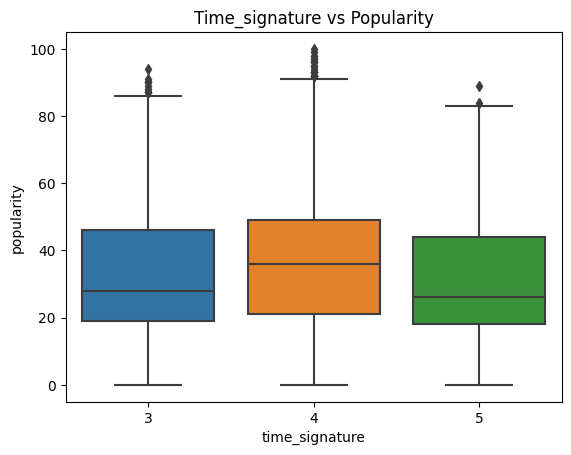

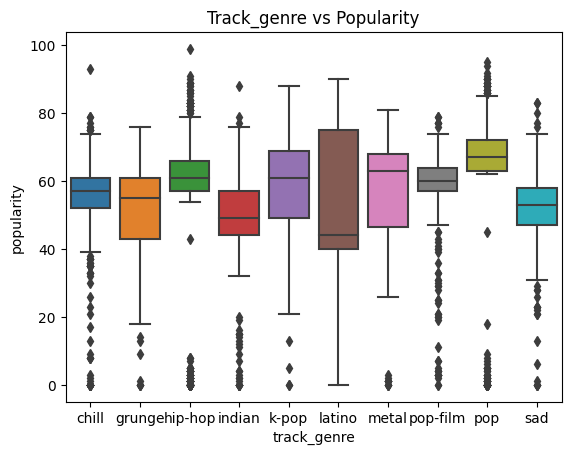

In [12]:
cat_features = ['explicit','key','mode','time_signature']
N = 10  # number of top genres to include

# calculate the average popularity for each genre
genre_popularity = df.groupby('track_genre')['popularity'].mean()

# get the top N genres by average popularity
top_genres = genre_popularity.nlargest(N).index

# filter the data to include only rows with a genre in the top N genres
df_top_genres = df[df['track_genre'].isin(top_genres)]
plot_box_cat(df, cat_features)
plot_box_cat(df_top_genres, ['track_genre'])

### Create a popularity flag where popularity > 3rd quantile

In [13]:
popularity_threshold = df['popularity'].quantile(0.75)
df['popularity_flag'] = (df['popularity'] > popularity_threshold).astype(int)

In [14]:
df.head(10)

popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          73       230666     False         0.676  0.4610    1    -6.746   
1          55       149610     False         0.420  0.1660    1   -17.235   
2          57       210826     False         0.438  0.3590    0    -9.734   
3          71       201933     False         0.266  0.0596    0   -18.515   
4          82       198853     False         0.618  0.4430    2    -9.681   
5          58       214240     False         0.688  0.4810    6    -8.807   
6          74       229400     False         0.407  0.1470    2    -8.822   
7          80       242946     False         0.703  0.4440   11    -9.331   
8          74       189613     False         0.625  0.4140    0    -8.700   
9          56       205594     False         0.442  0.6320    1    -6.770   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.1430        0.0322          0.000001    0.3580   0.7150   
1     1       0.0763        0.9240          0.000006    0.1010   0.2670   
2     1       0.0557        0.2100          0.000000    0.1170   0.1200   
3     1       0.0363        0.9050          0.000071    0.1320   0.1430   
4     1       0.0526        0.4690          0.000000    0.0829   0.1670   
5     1       0.1050        0.2890          0.000000    0.1890   0.6660   
6     1       0.0355        0.8570          0.000003    0.0913   0.0765   
7     1       0.0417        0.5590          0.000000    0.0973   0.7120   
8     1       0.0369        0.2940          0.000000    0.1510   0.6690   
9     1       0.0295        0.4260          0.004190    0.0735   0.1960   

     tempo  time_signature track_genre  popularity_flag  
0   87.917               4    acoustic                1  
1   77.489               4    acoustic                1  
2   76.332               4    acoustic                1  
3  181.740               3    acoustic                1  
4  119.949               4    acoustic                1  
5   98.017               4    acoustic                1  
6  141.284               3    acoustic                1  
7  150.960               4    acoustic                1  
8  130.088               4    acoustic                1  
9   78.899               4    acoustic                1

### Box plot of popularity flag vs continuous features

In [15]:
def plot_data(df):
    continuous_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    for column in continuous_columns:
        sns.boxplot(x='popularity_flag', y=column, data=df)
        plt.xlabel('popularity_flag')
        plt.ylabel(column)
        plt.title(f'popularity_flag vs {column}')
        plt.show()

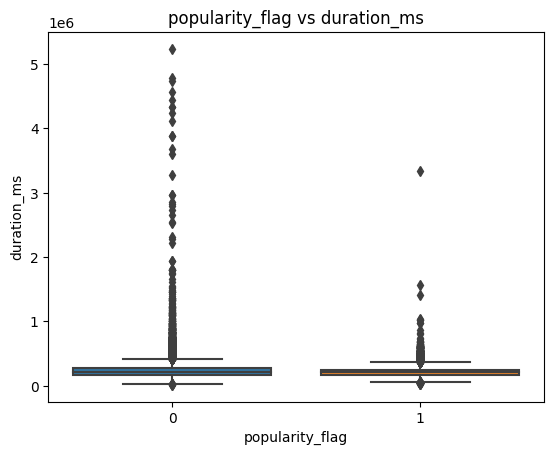

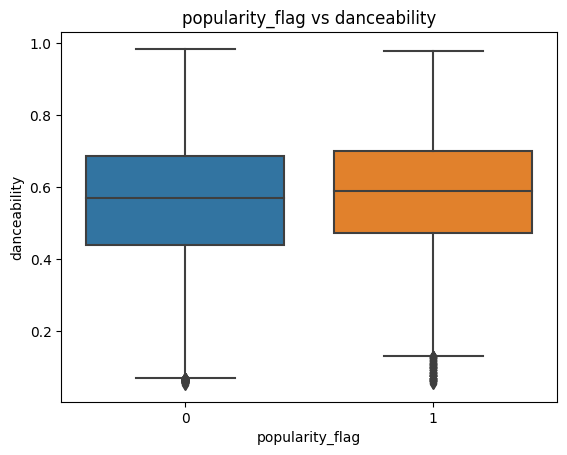

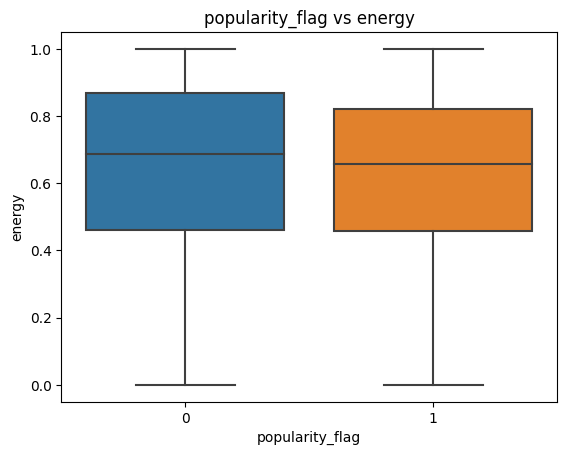

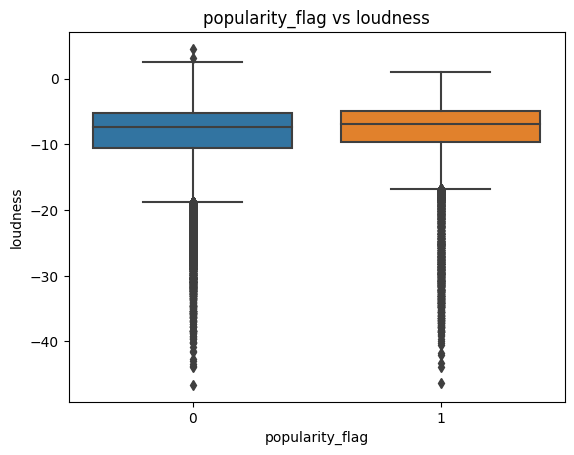

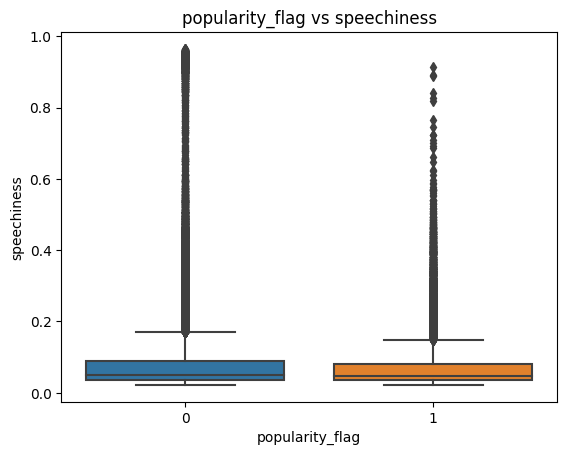

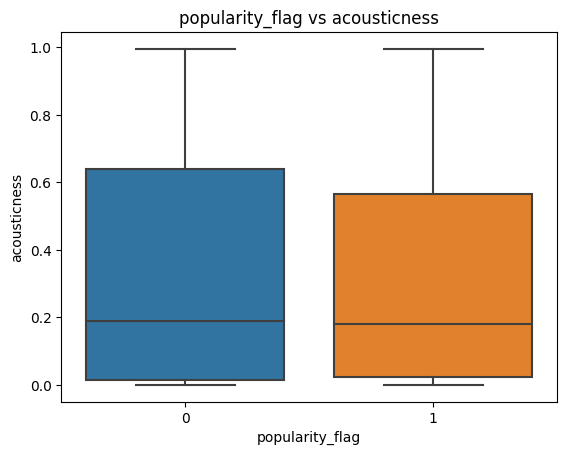

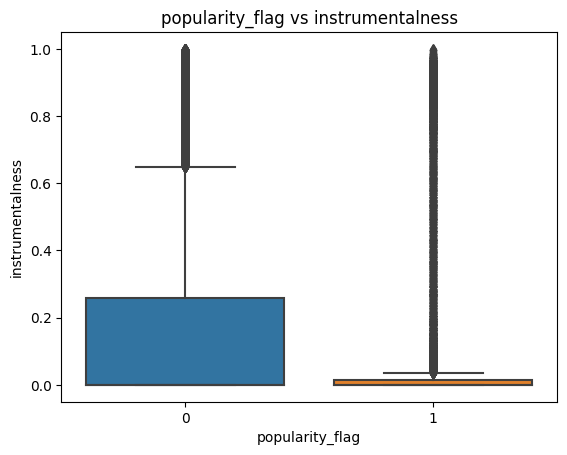

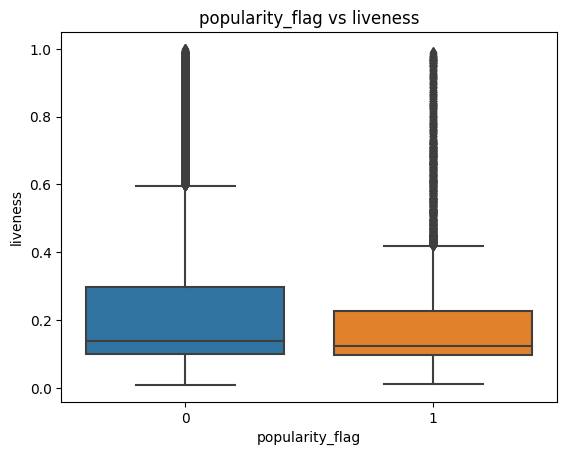

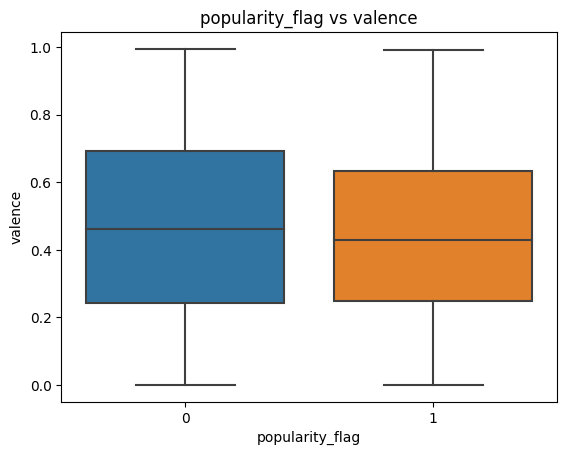

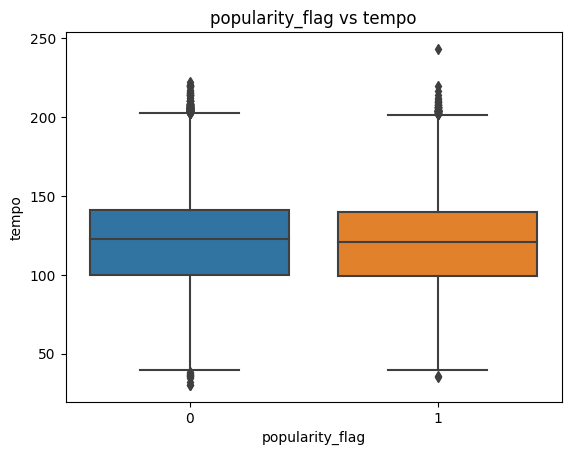

In [16]:
plot_data(df)

### Plot conditional distribution of categorical columns vs popularity flag

In [17]:
def plot_conditional_distribution(df, cat_columns):
    for cat_col in cat_columns:
        df_grouped = df.groupby(cat_col)['popularity_flag'].value_counts(normalize=True).unstack()
        df_grouped.plot(kind='bar', stacked=True)
        plt.xlabel(cat_col)
        plt.ylabel('Proportion')
        plt.title(f'Conditional Distribution of popularity_flag by {cat_col}')
        plt.show()

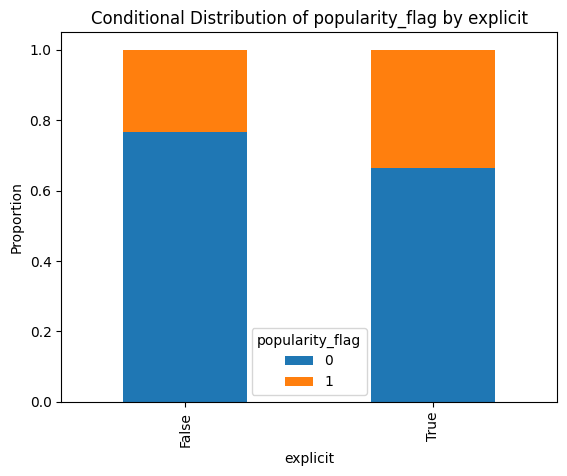

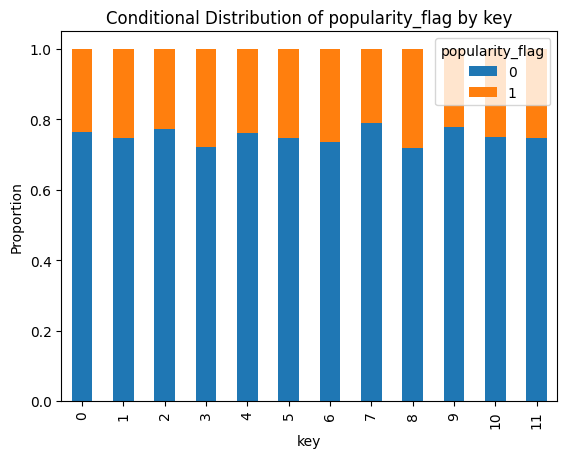

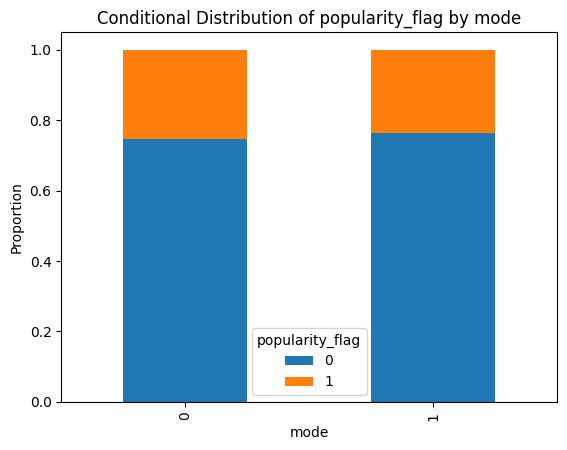

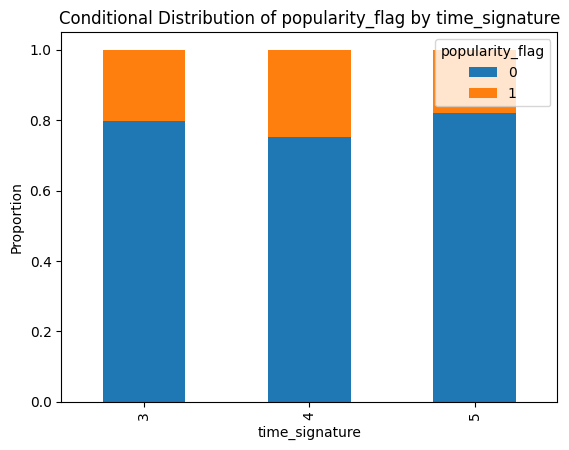

In [18]:
cat_features = ['explicit','key','mode','time_signature']

plot_conditional_distribution(df,cat_features)